# Classification

1. The dataset can be downloaded from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/.

2. Download `iris.data` file from the Data Folder. The Data Set description with the definitions of all the columns can be found on the dataset page - https://archive.ics.uci.edu/ml/datasets/Iris.


In [6]:
# Here are all imports that you will need

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

---
3. Load the data from the file (`iris.data`) into the DataFrame. Set the names of columns according to the column definitions given in Data Description.

In [7]:
irisData = pd.read_csv('iris.data', sep=',',
                       names=['sepal_length','sepal_width','petal_length','petal_width','iris_class'])

---
4. __(3 points)__ **Data inspection.** Display the first 5 rows of the dataset and use any relevant functions that can help you to understand the data. Prepare 2 scatter plots - `sepal_width` vs `sepal_length` and `petal_width` vs `petal_length`. Scatter plots should show each class in different color (`seaborn.lmplot` is recommended for plotting). 

In [8]:
# Display the first 5 rows of the dataset
irisData.head()

,sepal_length,sepal_width,petal_length,petal_width,iris_class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
# Using relevant functions that can help you to understand the data
irisData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
iris_class      150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [10]:
# number of rows 
len(irisData)

150

In [11]:
# number of None value of each column
irisData.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
iris_class      0
dtype: int64

- **Number of columns** = 4
- **Number of rows** = 150
- **Data type** of values is float64 and in centimeter 
- **No None** value

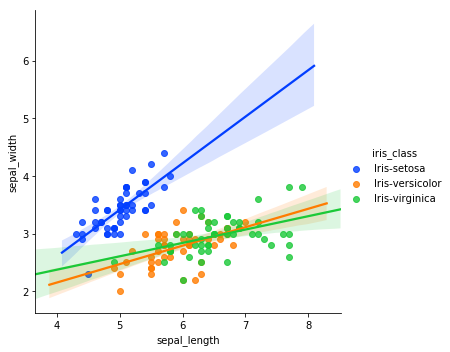

In [12]:
# Scatter plots using lmplot: sepal_width vs sepal_length and petal_width vs petal_length

sns.lmplot(x='sepal_length',y='sepal_width',
           data=irisData, hue='iris_class', 
           palette='bright', legend_out=True)

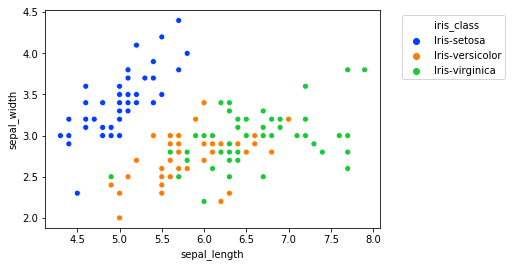

In [13]:
# Scatter plots using scatter: sepal_width vs sepal_length and petal_width vs petal_length

sns.scatterplot(x='sepal_length',y='sepal_width',
           data=irisData, hue='iris_class', 
           palette='bright')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.5)

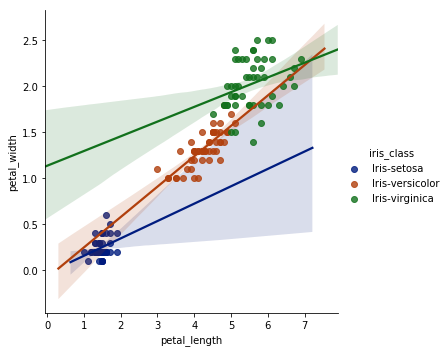

In [14]:
# Scatter plots using lmplot: petal_width vs petal_length

sns.lmplot(x='petal_length',y='petal_width',
           data=irisData, hue='iris_class', 
           palette='dark', legend_out=True)

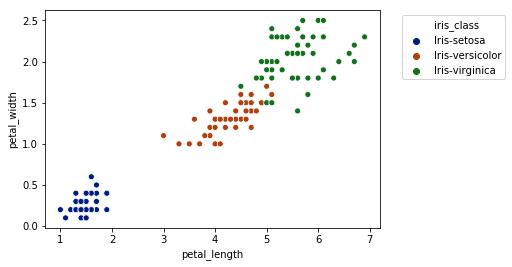

In [15]:
# Scatter plots using scatter: petal_width vs petal_length

sns.scatterplot(x='petal_length',y='petal_width',
           data=irisData, hue='iris_class', 
           palette='dark')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.5)

---
5. **Prepare the data for classification**. Using the pandas operators prepare the feature variables `X` and the response `Y` for the fit. Note that `sklean` expects data as arrays, so convert extracted columns into arrays.

In [16]:
# Preparing the feature variables X and the response Y and coverting DataFrames to ndarray

X = irisData.iloc[:, :4].to_numpy()
Y = irisData.iloc[:, 4].to_numpy()
print(f'type of X is {type(X)} and type of Y is {type(Y)}')

type of X is <class 'numpy.ndarray'> and type of Y is <class 'numpy.ndarray'>


---
6. __(1 point)__ **Split** the data into `train` and `test` using `sklearn` `train_test_split` function.

In [17]:
# Spliting the data into train and test: 70% as train set and 30% as test set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, test_size=0.3)

In [18]:
# train set size

len(X_train)

105

In [19]:
# test set size

len(X_test)

45

##### The size of each class

In [20]:
np.unique(Y, return_counts=True)

(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object),
 array([50, 50, 50]))

In [21]:
np.unique(Y_train, return_counts=True)

(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object),
 array([34, 32, 39]))

In [22]:
np.unique(Y_test, return_counts=True)

(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object),
 array([16, 18, 11]))

---
7. **Run the fit** using `KNeighborsClassifier` from `sklearn.neighbors`. First, instantiate the model and then run classifier on the training set.

In [23]:
# One way to find the best k is using the square root of size of data 

import math 
int(math.sqrt(len(Y_test)))

6

In [24]:
classifier = KNeighborsClassifier(n_neighbors=6, p=2, metric='euclidean')
classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

---
8. Use learning model to **predict the class from features**, run prediction on `X` from test part. Show the **accuracy score** of the prediction by comparing predicted iris classes and the `Y` values from the test. Also, comparing these two arrays (predicted classes and test Y) count the numbers of correct predictions and predictions that were wrong. (`NumPy` array can be compared with `==` operator and `NumPy` operator `count_nonzero` counts number of non-False).


In [25]:
# Run classifier on test set

Y_predicted = classifier.predict(X_test)
Y_predicted

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [26]:
# Calculating the accuracy score of the prediction

from sklearn.metrics import accuracy_score

accuracy_score(Y_test, Y_predicted)

0.9777777777777777

our accuracy is almost **97.7%** that means our classifier performs well on test set.

In [27]:
# Comparing two Y_predicted and Y_text arrays using numpy functions

Y_predicted == Y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True])

In [28]:
np.count_nonzero(Y_test == Y_predicted)

44

Therefore, there is just **one** wrong prediction. 

#### Using other metrics to analyze the performance of the classifier 

In [29]:
np.unique(Y_test, return_counts=True)

(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object),
 array([16, 18, 11]))

In [30]:
# Calculating the confusion matrix 

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_predicted, labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
cm

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]])

The right diagnal shows the true predictions. Comparing with true Y values, the classifier performs well. 

In [31]:
# Calculating F1-score 

from sklearn.metrics import f1_score

f1_score(Y_test, Y_predicted, average=None, labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

array([1.        , 0.97142857, 0.95652174])

The f1-score considers both precision and recall. The value of f1-score for each class shows how the classifier could predict well. 
As it is shown, the classifier performs well especially for 'Iris-setosa' class.

---
9. Repeat the fit with **different number of neighbors (1, 3, 5, 10, 20, 50)**. Show how accuracy score and the number of correct predictions change with the number of neighbors.

In [32]:
k_list = [1,3,5,10,20,50]
    
for k in k_list: 
    classifier.n_neighbors = k
    classifier.fit(X_train, Y_train)
    Y_prd = classifier.predict(X_test)
    accuracy = accuracy_score(Y_test,Y_prd) *100
    n_correct_prediction = np.count_nonzero(Y_test == Y_prd)
    print(f'\n ** At k = {k} the accuracy is {accuracy:.2f}% and the number of correct predictions is {n_correct_prediction} out of {len(Y_test)}')     
    


 ** At k = 1 the accuracy is 97.78% and the number of correct predictions is 44 out of 45

 ** At k = 3 the accuracy is 97.78% and the number of correct predictions is 44 out of 45

 ** At k = 5 the accuracy is 97.78% and the number of correct predictions is 44 out of 45

 ** At k = 10 the accuracy is 97.78% and the number of correct predictions is 44 out of 45

 ** At k = 20 the accuracy is 97.78% and the number of correct predictions is 44 out of 45

 ** At k = 50 the accuracy is 91.11% and the number of correct predictions is 41 out of 45


Generally speaking, there is not specific perfect value for K that works well on every data set. K-Nearest Neighbours tries to approximate a locally smooth function. The standard approach to choose 𝑘 is to try different values of 𝑘 and see which provides the best accuracy on a particular data set. 

Since our data set is small, having just 150 rows, increasing value of K does not affect significantly on the accuracy except at k=50 that the accuracy decreased. 
Generally, larger values of 𝑘 provide more smoothing, that might not be desirable.